## Задание 4

Продемонстрируйте, что скорость сходимости к нормальному распределению в рамках центральной предельной теоремы может быть различной для различных распределений.

In [1]:
from scipy.stats import expon, kstest, arcsine, laplace, chi2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font="serif", font_scale=1.1)

In [2]:
def generate_sample(n, dist):
    return np.sqrt(n) * (np.mean(dist.rvs(size=n)) - dist.mean()) / dist.std()

Будем увеличивать n с шагом **в** 2 раза. 
Для проверки на качество сходимости будем генерировать 1000 сэмплов и смотреть на расстрояние Колмогорова-Смирнова.
Также можно смотреть на p-value для теста Колмогорова-Смирнова.

In [3]:
def simulate(dist, samples=1000, max_degree = 12):
    ns = [2 ** i for i in range(max_degree)]
    ks_dist = []

    for n in ns:
        ds = [np.sqrt(n) * (np.mean(dist.rvs(size=n)) - dist.mean()) / dist.std() for _ in range(samples)]
        res = kstest(ds, 'norm')
        ks_dist.append(res[0])
        print(f'N = {n}:', res)
    
    plt.plot(ks_dist)

    plt.xticks(range(max_degree), ns)
    plt.ylabel('ks distance')
    plt.xlabel('n')
    
    plt.show(ns)
    plt.show()


### Экспоненциальное распределение

N = 1: KstestResult(statistic=0.15916015112953974, pvalue=1.3518381642745489e-22)
N = 2: KstestResult(statistic=0.10435834383226461, pvalue=6.170088690808532e-10)
N = 4: KstestResult(statistic=0.08127447061980642, pvalue=3.4102091772545365e-06)
N = 8: KstestResult(statistic=0.05909951346398756, pvalue=0.0017719523482509919)
N = 16: KstestResult(statistic=0.0430075874920432, pvalue=0.04804860193857604)
N = 32: KstestResult(statistic=0.04991733775510576, pvalue=0.01322972843647488)
N = 64: KstestResult(statistic=0.03987372036389991, pvalue=0.08096892537282813)
N = 128: KstestResult(statistic=0.020604783165498186, pvalue=0.7895611583238765)
N = 256: KstestResult(statistic=0.03488774893348834, pvalue=0.1712646876412327)
N = 512: KstestResult(statistic=0.022267674307478225, pvalue=0.7042897583027642)
N = 1024: KstestResult(statistic=0.035375419713039036, pvalue=0.1598653359623428)
N = 2048: KstestResult(statistic=0.021639587994448817, pvalue=0.7371812428016876)


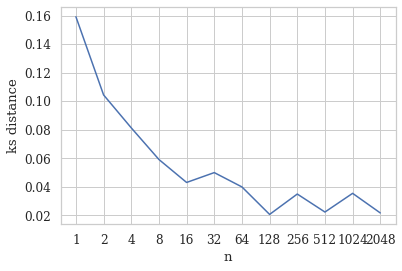

In [4]:
simulate(expon)

### Арксинусоидальное распределение

N = 1: KstestResult(statistic=0.12358836775747345, pvalue=9.031277247359137e-14)
N = 2: KstestResult(statistic=0.04535218343980718, pvalue=0.03169133610229759)
N = 4: KstestResult(statistic=0.02524147014774525, pvalue=0.5470650635787754)
N = 8: KstestResult(statistic=0.029724288044531866, pvalue=0.3349771571568788)
N = 16: KstestResult(statistic=0.013545979277201442, pvalue=0.9929637049460509)
N = 32: KstestResult(statistic=0.03199135886742499, pvalue=0.2528169858843039)
N = 64: KstestResult(statistic=0.029950811844112524, pvalue=0.3259913551278457)
N = 128: KstestResult(statistic=0.023462089378689044, pvalue=0.6407540067892672)
N = 256: KstestResult(statistic=0.02940868355388493, pvalue=0.34779191957442074)
N = 512: KstestResult(statistic=0.019643593760053424, pvalue=0.8350513155018181)
N = 1024: KstestResult(statistic=0.03836351029488955, pvalue=0.10266705636103937)
N = 2048: KstestResult(statistic=0.0217343078846029, pvalue=0.7322615783767581)


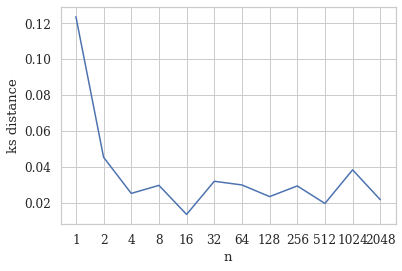

In [5]:
simulate(arcsine)

### Распределение Лапласа

N = 1: KstestResult(statistic=0.0857793131905148, pvalue=7.514799547738303e-07)
N = 2: KstestResult(statistic=0.0345889262324518, pvalue=0.17856365184916725)
N = 4: KstestResult(statistic=0.0523028181190488, pvalue=0.008106976425082603)
N = 8: KstestResult(statistic=0.022759283380162476, pvalue=0.678220033094266)
N = 16: KstestResult(statistic=0.03813470255573015, pvalue=0.10634258195240064)
N = 32: KstestResult(statistic=0.027650194113431795, pvalue=0.4255916900997487)
N = 64: KstestResult(statistic=0.027678024664075873, pvalue=0.42427501057803907)
N = 128: KstestResult(statistic=0.026888525435199817, pvalue=0.4626997537755074)
N = 256: KstestResult(statistic=0.03182989139808062, pvalue=0.2581106709001156)
N = 512: KstestResult(statistic=0.02933985659700894, pvalue=0.3506324615856006)
N = 1024: KstestResult(statistic=0.016447695788546546, pvalue=0.9495985070541638)
N = 2048: KstestResult(statistic=0.03413048856896472, pvalue=0.1902382577453765)


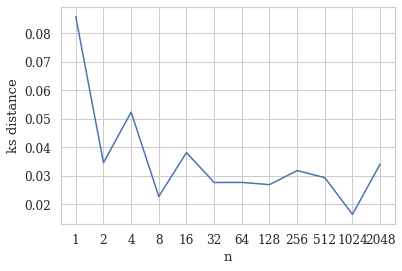

In [6]:
simulate(laplace)

### Вывод:
Быстрее всех сошлось арксинусоидальное распределение, медленее всех экспоненциальное.
